# Subsets

![SmartSelect_20250304_140422_Samsung Notes.jpg](<attachment:SmartSelect_20250304_140422_Samsung Notes.jpg>)
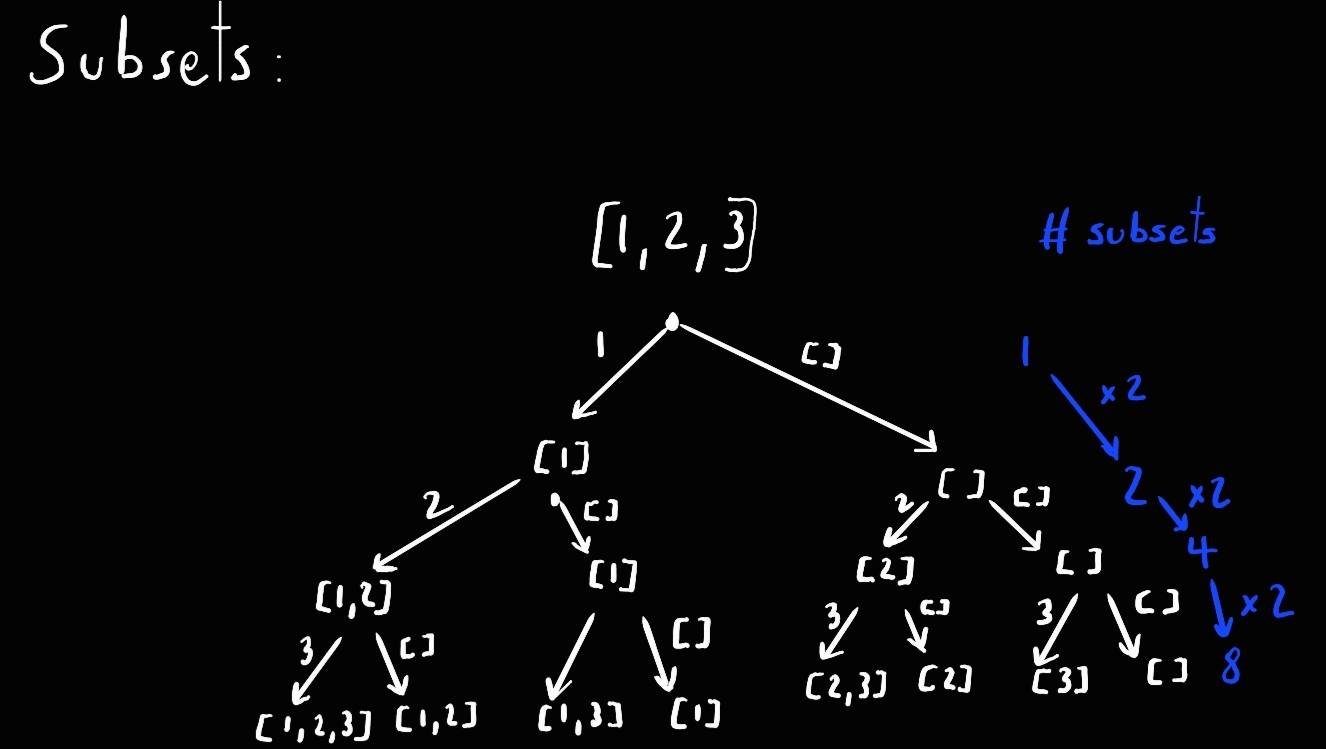

In [ ]:
from typing import List


class Solution:
    def subsets(self, nums: List[int]) -> List[List[int]]:
        nums_len = len(nums)
        res = []
        subset = []

        def dfs(i):
            # base case
            if i >= nums_len:
                res.append(subset.copy())
                return
            # decision to include nums[i] (left node)
            subset.append(nums[i])
            dfs(i + 1)
            # decision to NOT include nums[i] (right node)
            subset.pop()
            dfs(i + 1)

        dfs(0)
        return res


sol = Solution()
sol.subsets([1, 2, 3])

# Palindrome partitioning

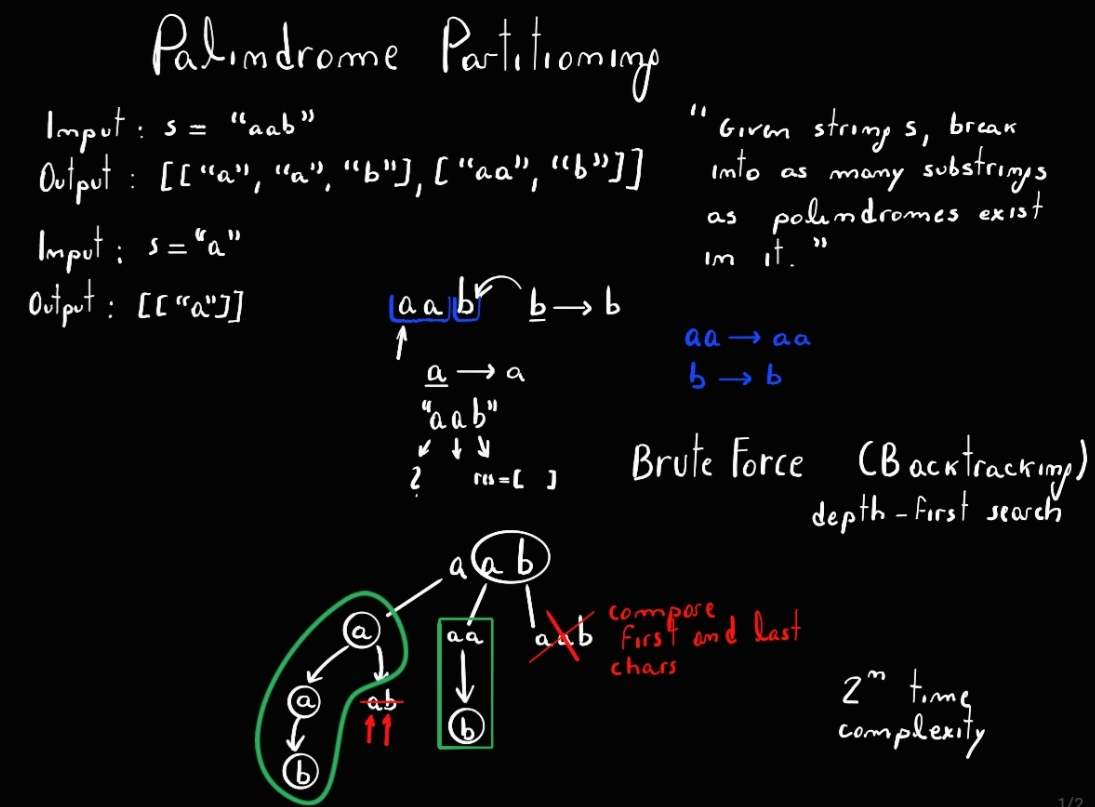

In [ ]:
from typing import List


class Solution:
    def partition(self, s: str) -> List[List[str]]:
        res = []
        part = []
        s_len = len(s)

        def dfs(i):
            # base case (reached last index)
            if i >= s_len:
                res.append(part.copy())
                return
            # we haven't reached last index
            for j in range(i, s_len):
                if self.is_pali(s, i, j):
                    part.append(s[i : j + 1])
                    dfs(j + 1)
                    part.pop()

        dfs(0)
        return res

    def is_pali(self, string, left, right):
        while left < right:
            if string[left] != string[right]:
                return False
            left += 1
            right -= 1
        return True


sol = Solution()
sol.partition("aab")

# Letter combinations of a phone number

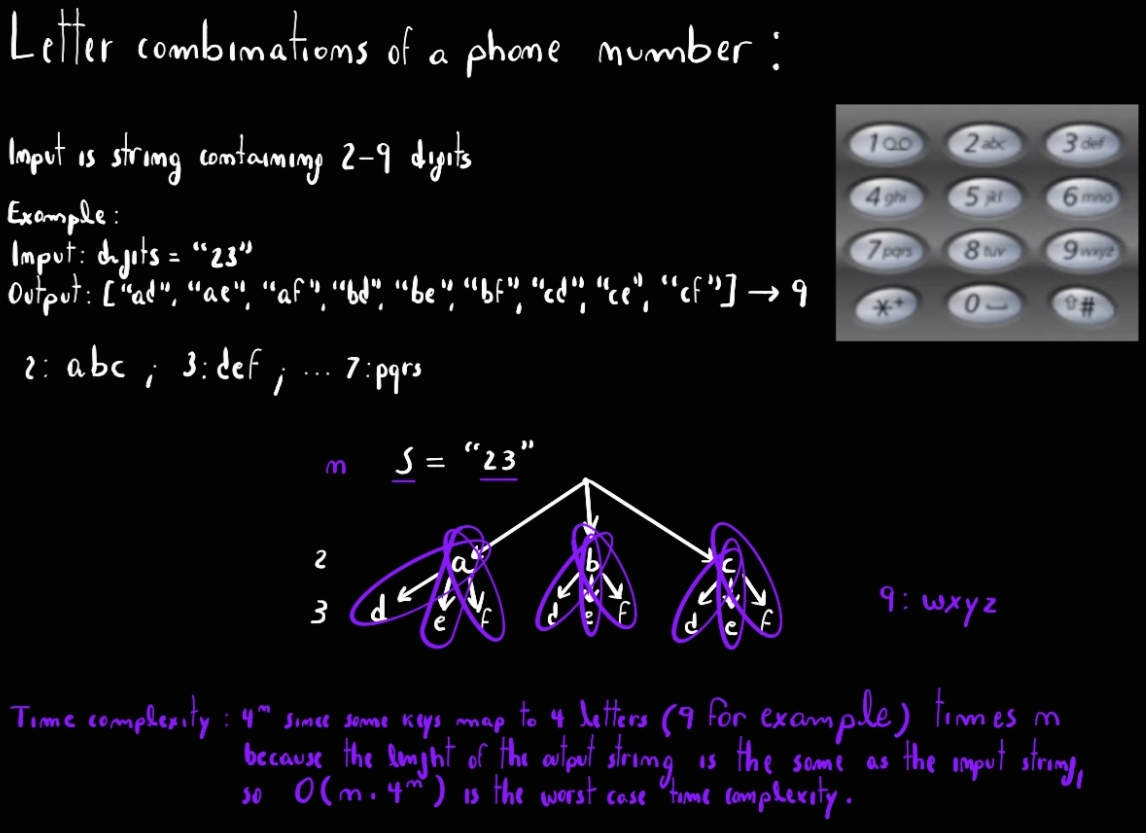

In [ ]:
from typing import List


class Solution:
    def letter_combinations(self, digits: str) -> List[str]:
        res = []
        digit_to_char = {
            "2": "abc",
            "3": "def",
            "4": "ghi",
            "5": "jkl",
            "6": "mno",
            "7": "pqrs",
            "8": "tuv",
            "9": "wxyz",
        }
        digits_len = len(digits)

        def dfs(digit_index, curr_str):
            if len(curr_str) == digits_len:
                res.append(curr_str)
                return
            # we haven't finished building the current string
            # we need to continue going through the digit that
            # we are at, at index 'digit_index'
            for c in digit_to_char[digits[digit_index]]:
                dfs(digit_index + 1, curr_str + c)

        # 'if' necessary because the solution in case digits is
        # an empty string, needs to be an empty list [] and not
        # [""]
        if digits:
            dfs(0, "")
        return res


sol = Solution()
sol.letter_combinations("23")

# Splitting a string into Descending Consecutive Values

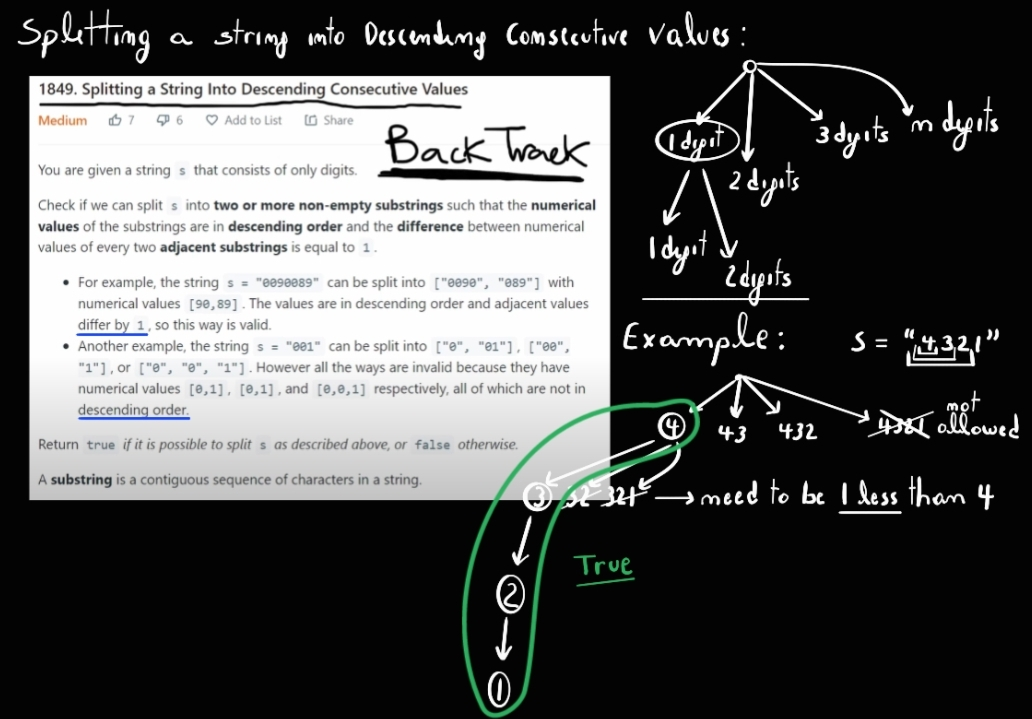

In [6]:
class Solution:
    def split_string(self, s: str) -> bool:

        def dfs(index, prev):
            if index == len(s):
                return True
            for j in range(index, len(s)):
                val = int(s[index : j + 1])  # this is not the first value
                if val + 1 == prev and dfs(j + 1, val):
                    return True
            return False

        # we don't go to the end because we need to
        # at least split in two
        for i in range(len(s) - 1):
            val = int(s[: i + 1])  # this is the first value
            # if dfs means we end up splitting the string sucessfully
            # so we return True. We pass in the index for the remainder
            # of the string, hence i+1.
            if dfs(i + 1, val):
                return True
        return False


sol = Solution()
sol.split_string("4321")

True

# Combination Sum

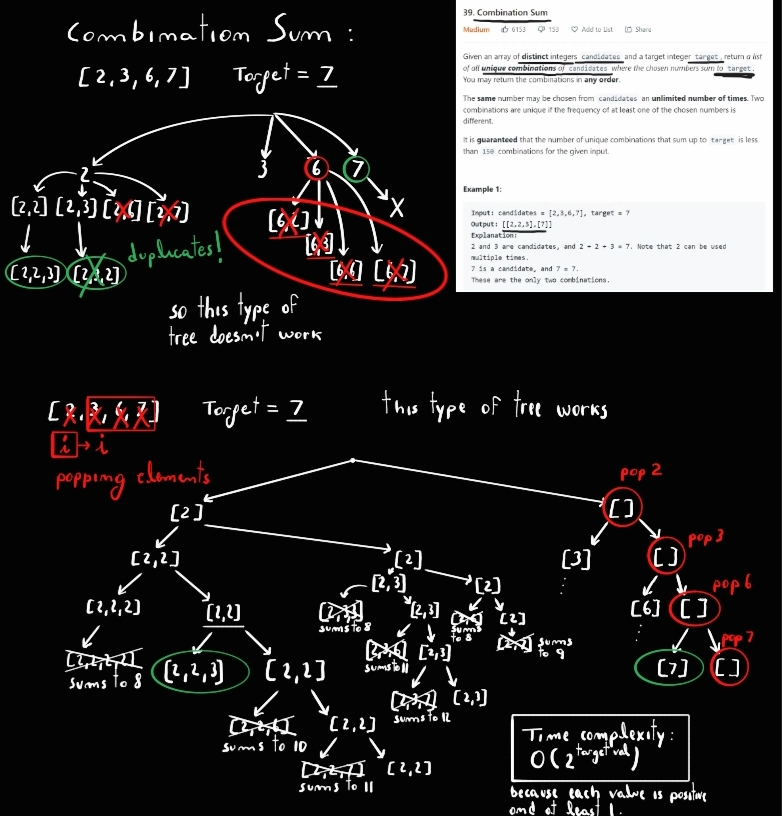

In [ ]:
from typing import List


class Solution:
    def combination_sum(self, candidates: List[int], target: int) -> List[List[int]]:
        res = []

        def dfs(i, cur, total):
            # base case success
            if total == target:
                res.append(cur.copy())
                return
            # base case impossible
            if i >= len(candidates) or total > target:
                return
            # two choices:
            # including the candidate:
            cur.append(candidates[i])
            # i and not i+1 because we want
            # to keep including candidates[i]
            # which means i stays the same
            dfs(i, cur, total + candidates[i])
            # not including the candidate:
            # to remove the candidate
            # that was added
            cur.pop()
            dfs(i + 1, cur, total)

        dfs(0, [], 0)
        return res


sol = Solution()
sol.combination_sum([1, 2, 3, 4, 5, 6, 7], 7)

# Combination Sum II

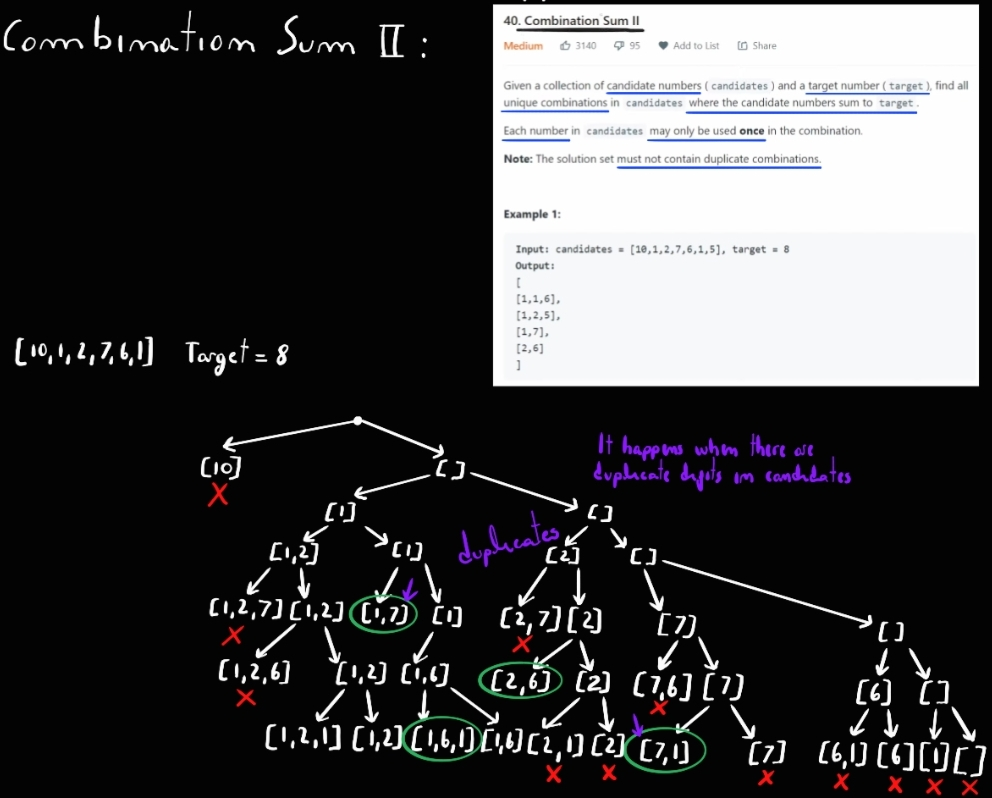

In [ ]:
from typing import List


class Solution:
    def combination_sum_ii(self, candidates: List[int], target: int) -> List[List[int]]:
        res = []
        # sorting prevents makes all duplicate numbers to be adjacent
        candidates.sort()

        def dfs(i, cur, total):
            # base case: success
            if total == target:
                # copy necessary because we will update cur and don't want to change the reference
                res.append(cur.copy())
                return
            # base case: unsucessful
            if total > target or i == len(candidates):
                return
            # include candidate
            cur.append(candidates[i])
            # not allowed to reuse the candidate at index i unlike combination_sum_i problem so i+1
            dfs(i + 1, cur, total + candidates[i])
            # because next we have to skip that element so we have to remove it
            cur.pop()
            # skip candidate
            # loop necessary because we want to skip duplicates
            # and the candidate list is sorted
            # example:  candidates=[1,1,1,1,1,2]
            # the i+1 < len(candidates) part is to deal with the
            # possible candidates=[1,1,1,1,1,1] case
            while i + 1 < len(candidates) and candidates[i] == candidates[i + 1]:
                i += 1
            dfs(i + 1, cur, total)

        dfs(0, [], 0)
        return res


sol = Solution()
sol.combination_sum_ii([10, 1, 2, 7, 6, 1, 5], 8)

[[1, 1, 6], [1, 2, 5], [1, 7], [2, 6]]

# Word Search

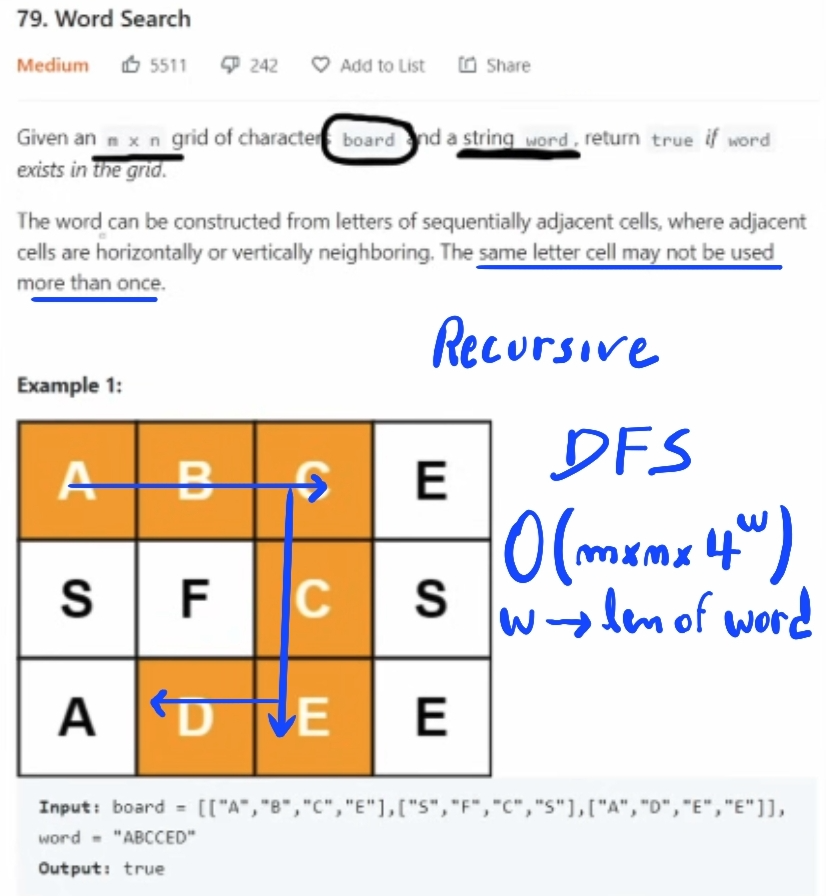

In [ ]:
from typing import List


class Solution:
    def word_search(self, board: List[List[str]], word: str) -> bool:
        ROWS, COLS = len(board), len(board[0])
        # we can't use the same letter cell more than once
        # so we use set to store the path
        path = set()

        # things i missed so far: did pass the r and c but did not pass the current letter we're looking for, i
        # in the bad case i forgot to return False, i just returned. Just return is when appending to lists.
        # missed removing the path after adding for dfs
        # forgot to for loop for every position in the grid
        def dfs(r, c, i):
            # base case success:
            if i == len(word):
                return True
            # base case failure:
            if (
                (r < 0 or c < 0)
                or (r >= ROWS or c >= COLS)
                or (word[i] != board[r][c])
                or (r, c) in path
            ):
                return False
            path.add((r, c))
            res = (
                dfs(r + 1, c, i + 1)
                or dfs(r + 1, c, i + 1)
                or dfs(r, c + 1, i + 1)
                or dfs(r, c - 1, i + 1)
            )
            path.remove((r, c))
            return res

        for r in range(ROWS):
            for c in range(COLS):
                if dfs(r, c, 0):
                    return True
        return False


board = [["A", "B", "C", "E"], ["S", "F", "C", "S"], ["A", "D", "E", "E"]]
word = "ABCCED"
sol = Solution()
sol.word_search(board, word)

True

# Permutations

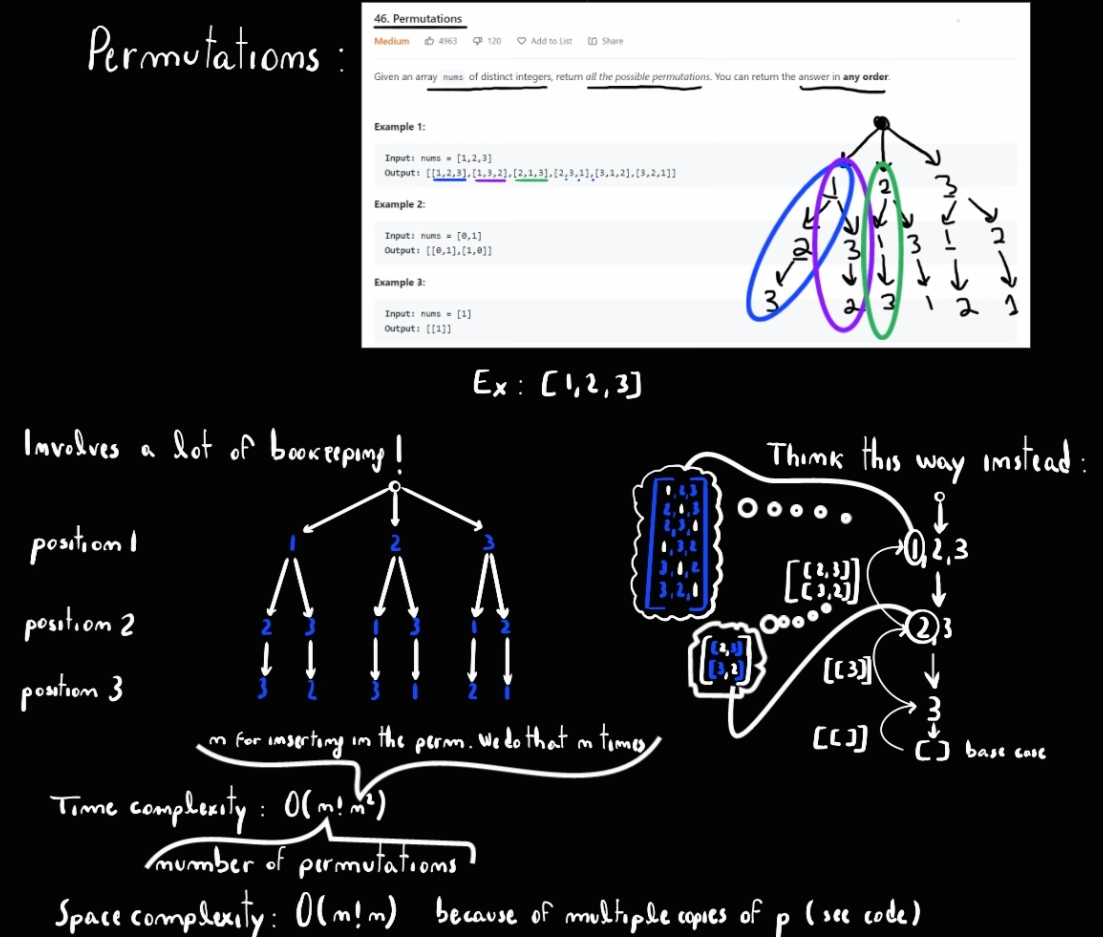

In [ ]:
class Solution:
    def permute(self, nums: List[int]) -> List[List[int]]:
        # base case
        if len(nums) == 0:
            return [[]]
        # consider perms of everything except the first element
        perms = self.permute(nums[1:])
        res = []
        for p in perms:
            for i in range(len(p) + 1):
                p_copy = p.copy()
                p_copy.insert(i, nums[0])
                res.append(p_copy)
        return res